<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/Data_Norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MasterStats

/content/drive/MyDrive/MasterStats


**Z-Transform**
<br>
Mean-center: subtract the average from each individual value
<br>

Variance-normalize: Divide by the standard deviation
<br>

The units are standard deviations away from the mean distribution

 ```
 zi = xi - x.mean/std.x
 ```

The Z Transforms shifts and stretches the data, but it doesnt change the shape of the distribution
<br>

*Key Assumption for Z Transformation:*
<br>

Mean and Standard Deviation are valid descriptors of the distributions central tendency and dispersion
<br>

Roughly Gaussian Distribution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

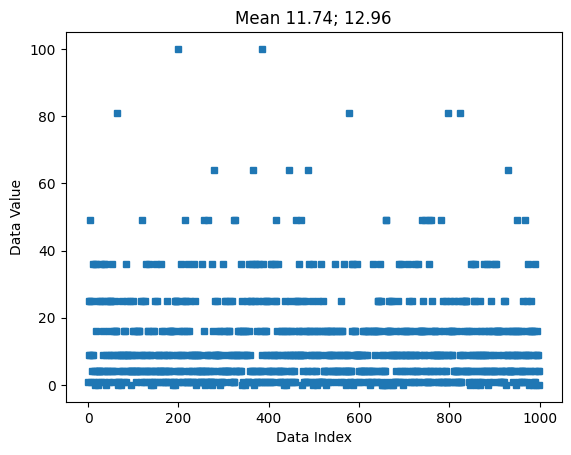

In [3]:
data = np.random.poisson(3,1000)**2

datamean = np.mean(data)
datastd = np.std(data, ddof=1)

#plot the data
plt.plot(data, 's', markersize=5)
plt.xlabel('Data Index')
plt.ylabel('Data Value')
plt.title(f'Mean {np.round(datamean, 2)}; {np.round(datastd,2)}')
plt.show()

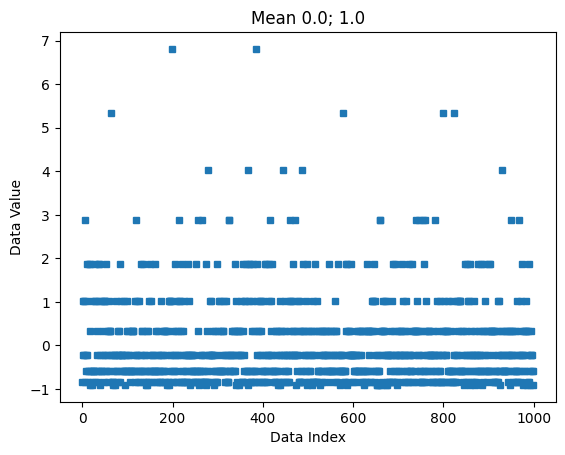

In [4]:
#manually compute the z-score

dataz = (data - datamean)/datastd

dataz2 = stats.zscore(data)

datazmean = np.mean(dataz)
datazstd = np.std(dataz)

#plot the data
plt.plot(dataz, 's', markersize=5)
plt.xlabel('Data Index')
plt.ylabel('Data Value')
plt.title(f'Mean {np.round(datazmean, 2)}; {np.round(datazstd,2)}')
plt.show()



The nature of the Z Transformation is to have a mean of 0 and a standard deviation of 1

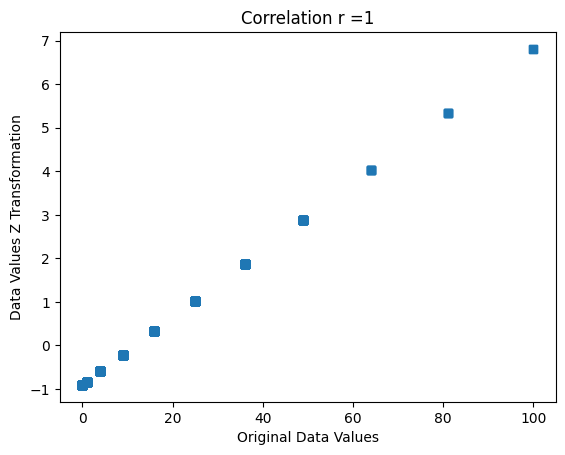

In [5]:
#Show how the relative values are preserved

plt.plot(data, dataz, 's')
plt.xlabel('Original Data Values')
plt.ylabel('Data Values Z Transformation')
plt.title('Correlation r =%g'%np.corrcoef(data, dataz)[0,0])
plt.show()

**Min-Max Scaling**
The most common application fo Min-Max Scaling is to put something in the range from 0 - 1
<br>
Thats a special term called *Unity Normalization*
<br>
Min Max transformation is not a lossy transformation the relative distribution is exactally the same as the original
```
minmax[i] = x[i] - x.min/ x.max - x.min
```
Min Max scaling is used in machine learning normalization when negative or extreme values are not tolerated

In [6]:
N = 45

#
data = np.log(np.random.rand(N)) * 234 + 934

#get min/man

datamin = min(data)
datamax = max(data)

datamm = (data - datamin)/ (datamax - datamin)

**Outliers**
<br>
Outliers can come from many possible sources, noisy data, faulty equipment, human error, or just natural variation.
<br>
**Why are Outliers bad**
<br>
Many statistical analysis use squared terms, and large outliers become huge when squared
<br>
That can cause the results to be incorrect or skwed.
*Not all outliers are created equally* and some are less influential than some.
<br>
That has to do where outliers are positioned in different dimensions of the data.
<br>
**How to handle outliers**
<br>
Identifying outliers and remove them from the data prior to analyses *assumption outliers are noise or otherwise invalid*
<br>
Leave outliers in and use robust methods to attenuate the negative outliers have on the results *assumptions outliers are unsual but otherwise valid data*
<br>
**How to remove outliers: Z-Score Method**
* Convert Data to Z score
* A data point is an outlier if it exceeds some standard deviation threshold/ often 3
* Remove outliers and repeat until outliers are no more

**Modified Z Score**
<br>
*for non-normal distribution*
* replace regular z scores with modified z scores
* Repeat methods

*useful for long tailed distribution*
<br>
The modified z score is based on medians rather than means
```
mz[i] = .6745(x - x.median)/MAD
MAD = median(|x - x.median|)
```


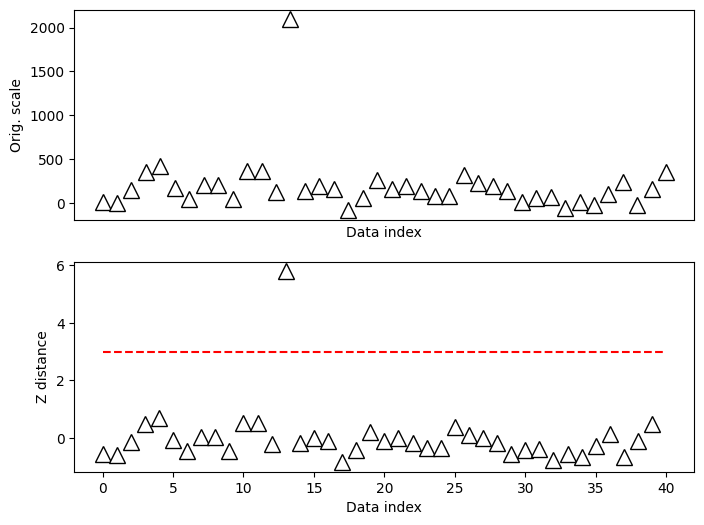

In [7]:
## Create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2] ** 2

data = data*200 + 50

#convert to z
dataZ = (data - np.mean(data)) / np.std(data)

### specify the z score threshold
zscorethresh = 3

# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

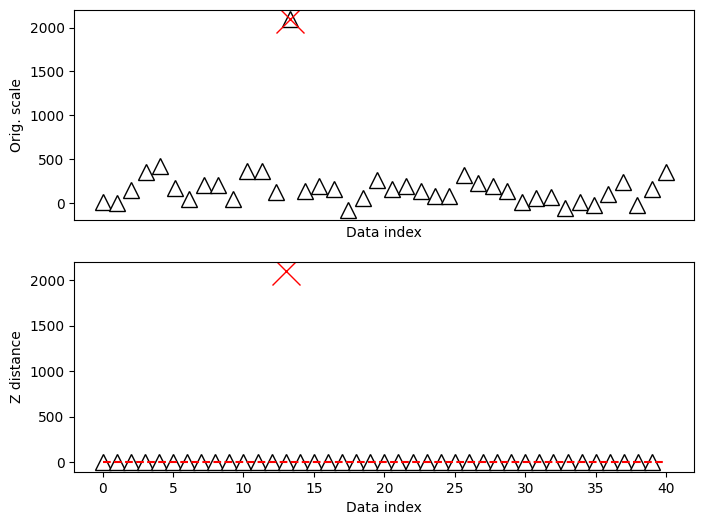

In [8]:
## identify outliers

outliers = np.where(abs(dataZ) > zscorethresh)[0]

#and cross them out
ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, data[outliers], 'x', color='r', markersize=20)

fig

In [9]:
from statsmodels import robust


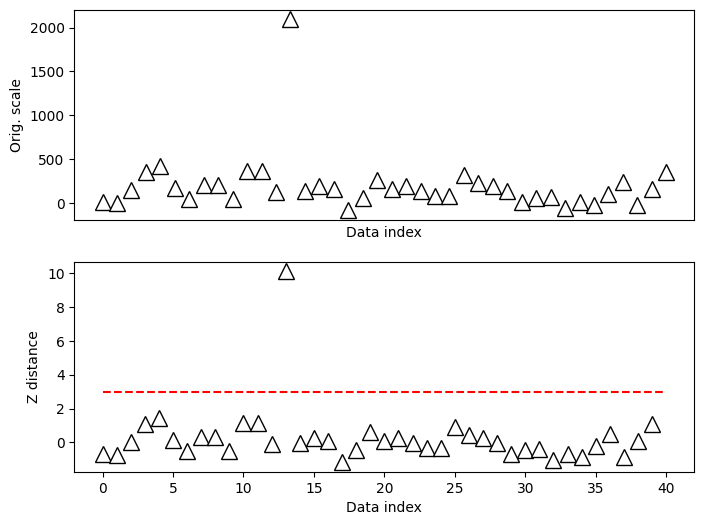

In [10]:
## modified Z for non normal distributions

#compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75) * (data-dataMed) / dataMAD

# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

**Outlier Detection: Multivariate**
<br>
You can think of variable X and variable Y as some points on a plane as a multivariate data space, and you can compute the distance inside the space
<br>
The next step would be to think about the multivariate mean, and that is just the mean of all dimensions. *mean along each dimension*
<br>
You can name that mean point 'B' and you then can the data space between every individual data point and B
<br>
**Z Method for Multivariate Dat**
*Multivariate Algorithm*
* Compute the data mean
* Compute each data point to the mean
* Convert distances to Z-score
<br>

<ipython-input-11-5930b783b227>:14: RuntimeWarning: invalid value encountered in sqrt
  ds = np.sqrt((d1[i]-datamean[0]**2) + (d2[i] - datamean[1]**2))
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Z distance')

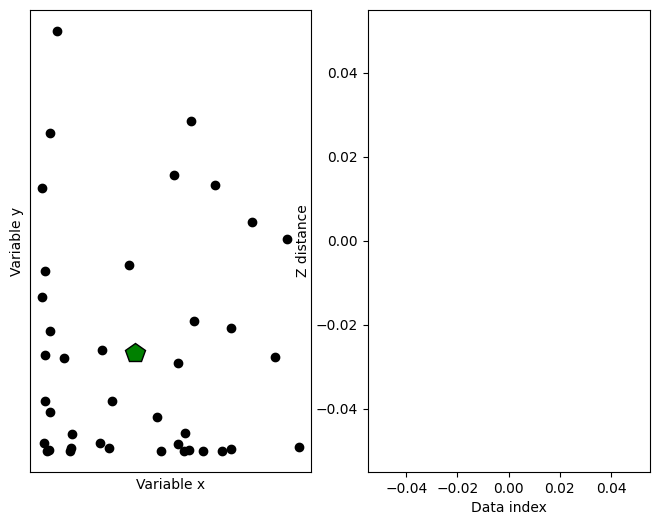

In [11]:
#create some data

N = 40

#two-dimensional
d1 = np.exp(-abs(np.random.randn(N)*3))
d2 = np.exp(-abs(np.random.randn(N)*5))

datamean = [np.mean(d1),np.mean(d2)]

#compute the distances to the mean
ds = np.zeros(N)
for i in range(N):
  ds = np.sqrt((d1[i]-datamean[0]**2) + (d2[i] - datamean[1]**2))

#convert to z
ds = (ds - np.mean(ds))/ np.std(ds, ddof=1)

# plot the data
fig,ax = plt.subplots(1,2,figsize=(8,6))

ax[0].plot(d1,d2,'ko',markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')

# plot the multivariate mean
ax[0].plot(datamean[0],datamean[1],'kp',markerfacecolor='g',markersize=15)

# then plot those distances
ax[1].plot(ds,'ko',markerfacecolor=[.7, .5, .3],markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

**Remove outliers by data trimming**
<br>
*Algorithm*
* Sort the mean centered data
* Remove the most extreme k values or the most extreme k%

*pros and cons*
Advantages: simple and easy to implement , can be effective
<br>
Disadvantages: Requires subjective threshold, can remove non outliers

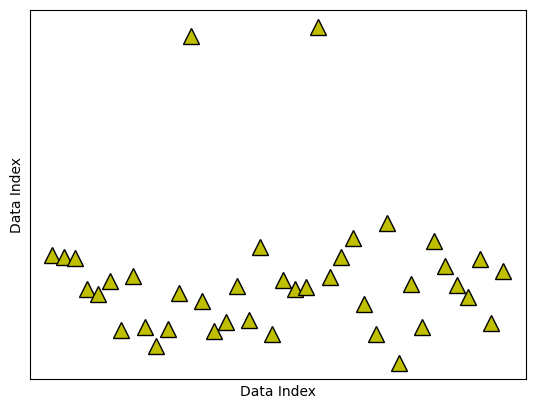

In [12]:
## creatw some data

#stilmulate normally distributed Gaussian data
#expected mean of 0 and std of 1

N = 40
data = np.random.randn(N,1)
#increase the probability of finding outliers
data[data<-2] = data[data<-2]**2
data[data>2] = data[data>2]**2

#mean centered data

dataMC = data - np.mean(data)

#plot them
fig, ax = plt.subplots(1,1)
ax.plot(data, 'k^', markerfacecolor='y', markersize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Data Index')
ax.set_ylabel('Data Index')

plt.show()





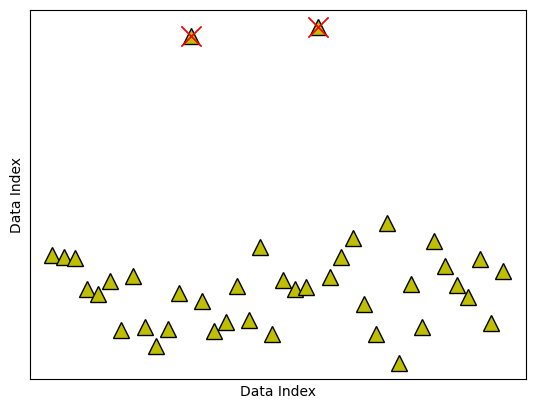

In [15]:
## option 1: remove K% of the data

#percent of 'extreme' data values to remove
trimPct = 5 #in percent

#identify the cut-off(note the abs())
datacutoff = np.percentile(abs(dataMC), 100 - trimPct)

#find the exceedence  data value
data2cut = np.where(abs(dataMC) > datacutoff)[0]

#mark those off
ax.plot(data2cut, data[data2cut], 'rx', markersize=15)

fig

**How to deal with outliers**
<br>
*Strategy 1:* Identify outliers and remove them from the data prior to any analyses
<br>
*Assumption* Outliers are noise or otherwise invalid

<br>
*Strategy 2:* Leave outliers in and use robust methods that attenuate the negative impact of the outliers on the results
<br>
*Assumption* Outliers are unsual but have value
<br>

***Nonparametric Test***
* Wilcoxon sign-rank test
* Mann-Whitney U Test
* Spearman correlation
* Kruskal-Wallis test
* Premutation testing
<br>
***Parametric Test***
* 1-Sample T-test
* 2-Sample T-test
* Pearso Correlation
* ANOVA
<br>




**Non-normal data distributions**
* log-normal *nothing to left peak and has a long tail*
* negative exponential *inverse of log normal*
* uniform
* generalized extreme *all the numbers between the values are equally likely to appear*
<br>
The issue with data normaliztions, like the Z- transformation is they rely on the assumption that the mean and standard deviation are valid indices of central tendecy of the data and the dispersion of the data
<br>
Not all data is Gaussian distributed and that can lead to having data values that are labled as outliers based on Gaussian measures like mean and std, but those data values might not actually be extreme because of non linear scalaing.
<br>
***Goal:***Transform data to make linear methods valid or to make data distribution approach Gaussian
<br>
***Common nonlinear data transformation***
* R-transform
* Logrithm
* Square root
very small numbers are spread apart and very large numbers are crunched together
* Fisher-Z - for bringing uniform distribution to Gaussian like distribution
<br>